# Центральная предельная теорема своими руками

In [206]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import laplace, norm
%matplotlib inline
plt.style.use('ggplot')

__1)__ При выборе непрерывного распределения я решил остановиться на [Laplace_distribution](https://en.wikipedia.org/wiki/Laplace_distribution), страница на scipy - [тык](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.laplace.html#scipy.stats.laplace)

In [195]:
μ = 0 # коэффициент сдвига
b = 0.5 # коэффициент масштаба 
rv = laplace(u, b) # задаём наше распределение

__2)__ Рисуем первоначальные графики теоретической плотности распределения случайной величины и гистограмму выборки. По ним можно заметить, что распределение Лапласа близко к нормальному, но имеет выраженный пик.

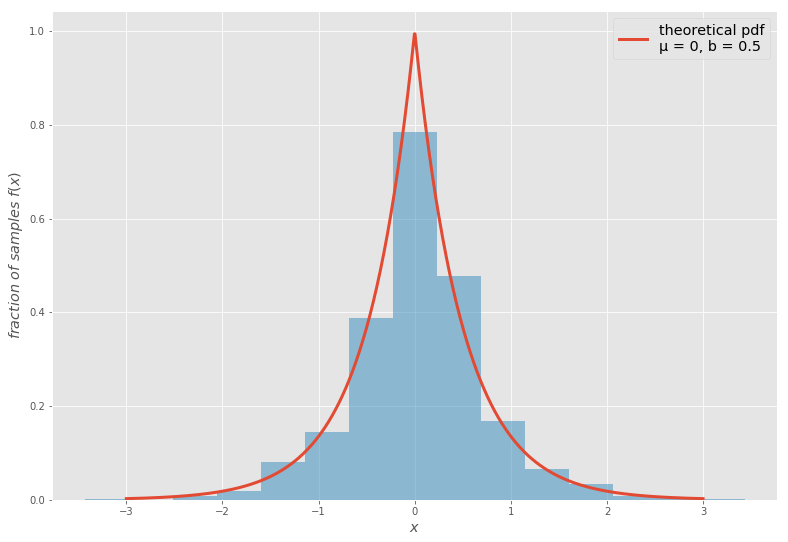

In [200]:
fig, ax = plt.subplots(figsize=(13, 9))

# Теоретическая плотность распределения случайной величины:
x = np.linspace(-3, 3, 1000)
ax.plot(x, rv.pdf(x), label='theoretical pdf\nμ = 0, b = 0.5', linewidth = 3)

# Гистограмма выборки:
r = rv.rvs(size=1000)
ax.hist(r, density=True, histtype='stepfilled', bins=15, alpha=0.5)

# Добавляем легенду, подписи осей:
ax.legend(loc='best', frameon=True, fontsize='x-large')

plt.ylabel('$fraction$ $of$ $samples$ $f(x)$', fontsize='x-large')
plt.xlabel('$x$', fontsize='x-large') 
plt.show()

__3)__ При трёх значениях n (5, 10, 50) генерирую 1000 выборок объёма n и строю гистограммы распределений их выборочных средних.

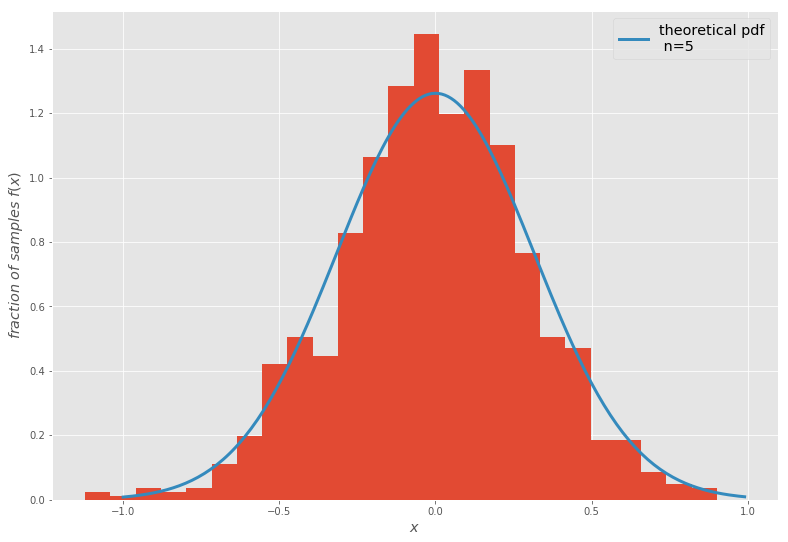

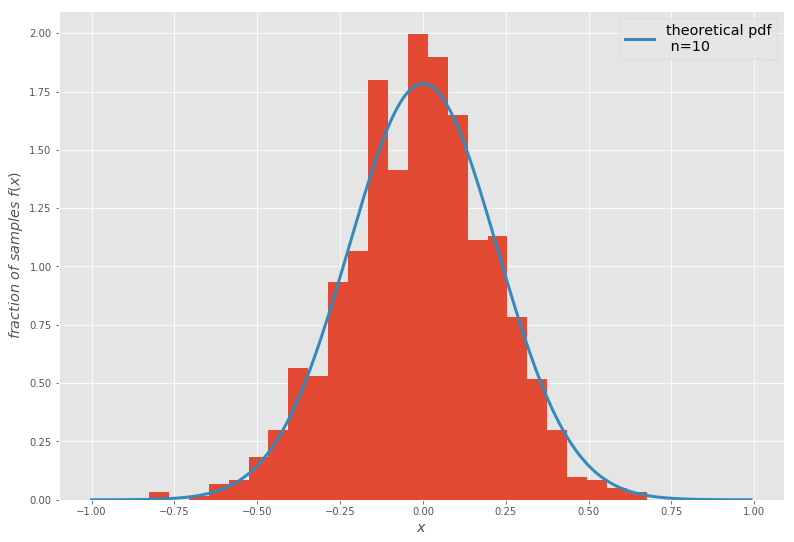

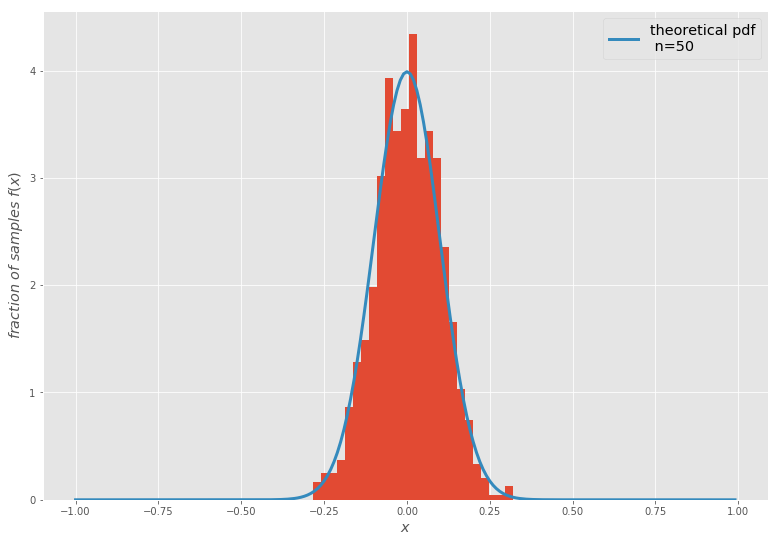

In [204]:
samples = [5, 10, 50] # объёмы выборок
for n in samples:
    sample = rv.rvs(size=(1000, n)) # Создаём 1000 выборок по n событий
    means = sample.mean(axis=1) # Считаем среднее в каждой выборке
    
    # По формулам из вики - https://en.wikipedia.org/wiki/Laplace_distribution
    # считаем мат. ожидание(Е) и дисперсию(Var):
    E = μ
    Var = 2 * (b**2)
    
    # Для нормального распределения:
    E_norm = E
    Var_norm = Var / n
    rv_norm = norm(E_norm, Var_norm**0.5)
    
    # Строим графики:
    fig, ax = plt.subplots(figsize=(13, 9))
    x = np.arange(-1, 1, 0.01)

    plt.hist(means, bins=25, density=True);
    plt.plot(x, rv_norm.pdf(x), label=f'theoretical pdf\n n={n}', linewidth = 3)
    
    # Добавляем легенду, подписи осей:
    ax.legend(loc='best', frameon=True, fontsize='x-large')
    plt.ylabel('$fraction$ $of$ $samples$ $f(x)$', fontsize='x-large')
    plt.xlabel('$x$', fontsize='x-large') 
    plt.show()

Из графиков видно, что c ростом n точность нормальной аппроксимации увеличивается, т.е. распределение выборочных средних при увеличение объёмов выборки(n) стремиться к нормальному, что является утверждением [центральной предельной теоремы](https://ru.wikipedia.org/wiki/%D0%A6%D0%B5%D0%BD%D1%82%D1%80%D0%B0%D0%BB%D1%8C%D0%BD%D0%B0%D1%8F_%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D1%8C%D0%BD%D0%B0%D1%8F_%D1%82%D0%B5%D0%BE%D1%80%D0%B5%D0%BC%D0%B0). 